<a href="https://colab.research.google.com/github/ugur-05/Finanzdatenanalyse-ML-Projekt/blob/main/CRM_Metrics%26Cluster_06Load_RUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRM Metrics & Cluster Analysis

In [ ]:
###############################################################
# Customer Segmentation with RFM
###############################################################

# Customer Segmentation with RFM in 6 Steps

# 1. Business Problem
# 2. Data Understanding
# 3. Data Preparation
# 4. Calculating RFM Metrics
# 5. Calculating RFM Scores
# 6. Naming & Analysing RFM Segments




In [ ]:
###############################################################
# Data Understanding
###############################################################

import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib as plt

#warnings.filterwarnings ("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Uyarilari Kapat
pd.options.mode.chained_assignment = None

In [ ]:
df_ = pd.read_excel("online_retail_II.xlsx",sheet_name="Year 2009-2010")

# Exploratory Data Analyse (EDA)  

In [ ]:
# Basic EDA : Exploratory Data Analyse

#df.head()

#df.info()

#df.shape

#df.isnull().sum()

#df.dropna(inplace=True)

#df.describe() --> for numeric data


In [ ]:
#df = df_
df = df_.copy()
df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.isnull().sum()
# Drop empty Customer ID rows!

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [ ]:
df.describe([0.1,0.25,0.5,0.75,0.9, 0.99]).T

#Quantity and price columns have - !!! Drop them.

,count,mean,min,10%,25%,50%,75%,90%,99%,max,std
Quantity,525461.00,10.34,-9600.00,1.00,1.00,3.00,10.00,24.00,120.00,19152.00,107.42
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-01-12 09:48:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-11-19 13:06:00,2010-12-08 10:40:00,2010-12-09 20:01:00,NaN
Price,525461.00,4.69,-53594.36,0.65,1.25,2.10,4.21,7.95,19.95,25111.09,146.13
Customer ID,417534.00,15360.65,12346.00,13042.00,13983.00,15311.00,16799.00,17706.00,18196.00,18287.00,1680.81


# Data Cleaning

In [ ]:
df.dropna(subset = ["Customer ID"], inplace=True)

In [ ]:
#df= df.dropna(subset = ["Customer ID"])

In [ ]:
df.isnull().sum()   #check null's again

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
df = df[(df['Quantity']>0) & (df['Price']>0)]

In [ ]:
df.describe().T    #check it one more time if (df['Quantity']>0) & (df['Price']>0)

,count,mean,min,25%,50%,75%,max,std
Quantity,407664.00,13.59,1.00,2.00,5.00,12.00,19152.00,96.84
InvoiceDate,407664,2010-07-01 10:15:11.871688192,2009-12-01 07:45:00,2010-03-26 14:01:00,2010-07-09 15:47:00,2010-10-14 17:09:00,2010-12-09 20:01:00,NaN
Price,407664.00,3.29,0.00,1.25,1.95,3.75,10953.50,34.76
Customer ID,407664.00,15368.59,12346.00,13997.00,15321.00,16812.00,18287.00,1679.76


In [ ]:
#Remove cancelled orders that have "C" letters in Stock Code.

df = df[~df["StockCode"].str.startswith("C", na=False)]      #Tilde (tilda ~)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407544 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407544 non-null  object        
 1   StockCode    407544 non-null  object        
 2   Description  407544 non-null  object        
 3   Quantity     407544 non-null  int64         
 4   InvoiceDate  407544 non-null  datetime64[ns]
 5   Price        407544 non-null  float64       
 6   Customer ID  407544 non-null  float64       
 7   Country      407544 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


# Data Mining / Insights

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [ ]:
# What is the number of unique products?

df["Description"].nunique()    #number of unique

4443

In [ ]:
# how many of which products do you have?

df["Description"].value_counts().head(20)

Description
WHITE HANGING HEART T-LIGHT HOLDER    3153
REGENCY CAKESTAND 3 TIER              1705
STRAWBERRY CERAMIC TRINKET BOX        1407
ASSORTED COLOUR BIRD ORNAMENT         1369
HOME BUILDING BLOCK WORD              1219
PACK OF 72 RETRO SPOT CAKE CASES      1204
REX CASH+CARRY JUMBO SHOPPER          1189
60 TEATIME FAIRY CAKE CASES           1189
LUNCH BAG RED SPOTTY                  1084
JUMBO BAG RED RETROSPOT               1084
HEART OF WICKER LARGE                 1045
RED HANGING HEART T-LIGHT HOLDER      1032
WOODEN FRAME ANTIQUE WHITE            1029
LUNCH BAG  BLACK SKULL.               1012
LOVE BUILDING BLOCK WORD               987
LUNCH BAG SUKI  DESIGN                 985
JUMBO STORAGE BAG SUKI                 982
PACK OF 60 PINK PAISLEY CAKE CASES     961
JUMBO SHOPPER VINTAGE RED PAISLEY      944
LUNCH BAG SPACEBOY DESIGN              933
Name: count, dtype: int64

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [ ]:
# Which is the most ordered product?
df.groupby("Description").agg({"Quantity": "sum"}).head()

,Quantity
Description,
DOORMAT UNION JACK GUNS AND ROSES,169
3 STRIPEY MICE FELTCRAFT,663
4 PURPLE FLOCK DINNER CANDLES,200
ANIMAL STICKERS,385
BLACK PIRATE TREASURE CHEST,47


In [ ]:
df.groupby("Description")['Quantity'].sum().reset_index().sort_values("Quantity", ascending=False).head(40)

,Description,Quantity
4259,WHITE HANGING HEART T-LIGHT HOLDER,56915
4365,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54754
690,BROCADE RING PURSE,48166
2631,PACK OF 72 RETRO SPOT CAKE CASES,45156
259,ASSORTED COLOUR BIRD ORNAMENT,44551
138,60 TEATIME FAIRY CAKE CASES,35806
2629,PACK OF 60 PINK PAISLEY CAKE CASES,31006
2068,JUMBO BAG RED RETROSPOT,29578
3851,SMALL POPCORN HOLDER,25718
413,BLACK AND WHITE PAISLEY FLOWER MUG,25685


In [ ]:
# how many invoices have been issued?
df["Invoice"].nunique()

19210

In [ ]:
# how many Customers do we have?
df["Customer ID"].nunique()

4312

In [ ]:
# Average revenue per invoice?

In [ ]:
df["Revenue"] = df["Quantity"] * df["Price"]

In [ ]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom,59.50
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom,30.60
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom,45.00


In [ ]:
df.groupby("Invoice").agg({"Revenue": "mean"}).head(20)

,Revenue
Invoice,
489434,63.16
489435,36.45
489436,33.18
489437,13.51
489438,134.48
489439,22.44
489440,25.20
489441,86.09
489442,16.62


In [ ]:
# what are the most expensive products?
df.sort_values("Price", ascending=False).head(35)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
135013,502263,M,Manual,1,2010-03-23 15:22:00,10953.50,12918.00,United Kingdom,10953.50
358639,524159,M,Manual,1,2010-09-27 16:12:00,10468.80,14063.00,United Kingdom,10468.80
74356,496115,M,Manual,1,2010-01-29 11:04:00,8985.60,17949.00,United Kingdom,8985.60
129903,501766,M,Manual,1,2010-03-19 11:35:00,6958.17,15760.00,Norway,6958.17
129987,501768,M,Manual,1,2010-03-19 11:45:00,6958.17,15760.00,Norway,6958.17
288706,517483,M,Manual,1,2010-07-29 12:29:00,3610.50,12737.00,France,3610.50
358670,524162,M,Manual,1,2010-09-27 16:18:00,2769.90,14063.00,United Kingdom,2769.90
418886,529356,M,Manual,1,2010-10-28 09:44:00,2736.16,14156.00,EIRE,2736.16
394037,527258,M,Manual,1,2010-10-15 12:40:00,2667.88,15202.00,United Kingdom,2667.88
374485,525498,M,Manual,1,2010-10-05 16:47:00,2545.85,14156.00,EIRE,2545.85


In [ ]:
# How many orders came from which country?
df["Country"].value_counts()

Country
United Kingdom          370900
EIRE                      8422
Germany                   7654
France                    5468
Netherlands               2729
Spain                     1235
Switzerland               1170
Belgium                   1037
Portugal                   984
Sweden                     868
Channel Islands            817
Italy                      710
Australia                  630
Cyprus                     541
Austria                    524
Greece                     512
Denmark                    418
Norway                     365
Finland                    347
United Arab Emirates       315
Unspecified                277
USA                        230
Poland                     182
Malta                      170
Japan                      164
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [ ]:
# how much income did countries generate?
df.groupby("Country").agg({"Revenue": "sum"}).sort_values("Revenue", ascending=False).astype(int).head()

,Revenue
Country,
United Kingdom,7413305
EIRE,351835
Netherlands,268786
Germany,202395
France,146005


## Calculating RFM Metrics

### Recency, Frequency, Monetary


In [ ]:
# Recency : Son alisverisinden bugüne kac gün gecti ?  --> Recency = Today's date - Last purchase date

In [ ]:
today_date = dt.datetime(2010, 12, 11)
print(today_date)

2010-12-11 00:00:00


In [ ]:
 df["Recency"] = df["InvoiceDate"]

In [ ]:
x= lambda a : a*5
print(x(10))

50


In [ ]:
df.head(30)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00,2009-12-01 07:45:00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60,2009-12-01 07:45:00
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00,2009-12-01 07:45:00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom,59.50,2009-12-01 07:45:00
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom,30.60,2009-12-01 07:46:00
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom,45.00,2009-12-01 07:46:00


In [ ]:
df.groupby('Customer ID').agg({'Recency': lambda x: (today_date - x.max()).days}).head()

,Recency
Customer ID,
12346.00,165
12347.00,3
12348.00,74
12349.00,43
12351.00,11


In [ ]:
df["Tenure"] = df["InvoiceDate"]

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Recency,Tenure
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40,2009-12-01 07:45:00,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,2009-12-01 07:45:00,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,2009-12-01 07:45:00,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80,2009-12-01 07:45:00,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00,2009-12-01 07:45:00,2009-12-01 07:45:00


In [ ]:
#tenure
df.groupby('Customer ID').agg({'Tenure': lambda date: (today_date - date.min()).days}).head()

,Tenure
Customer ID,
12346.00,361
12347.00,40
12348.00,74
12349.00,225
12351.00,11


# Frequency

In [ ]:
# Frequency : Alısveris sıklıgı -->  Müsteri bazinda fis sayısı :  Invoice count

In [ ]:
df.groupby('Customer ID').agg({'Invoice': "count"}).head()    #!!!! BU DEGIL !!!!!!! XXXXXXXXX

,Invoice
Customer ID,
12346.00,33
12347.00,71
12348.00,20
12349.00,102
12351.00,21


In [ ]:
df.groupby('Customer ID').agg({'Invoice': "nunique"}).head()

,Invoice
Customer ID,
12346.00,11
12347.00,2
12348.00,1
12349.00,3
12351.00,1


# Monetary

In [ ]:
# Bana kac para kazandırmıs ?    Müsteri bazinda kazanc toplami : Revenue sum

In [ ]:
df.groupby('Customer ID').agg({'Revenue': lambda Revenue: Revenue.sum()})

,Revenue
Customer ID,
12346.00,372.86
12347.00,1323.32
12348.00,222.16
12349.00,2671.14
12351.00,300.93
12352.00,343.80
12353.00,317.76
12355.00,488.21
12356.00,3562.25


In [ ]:
rfm = df.groupby('Customer ID').agg({'Recency': lambda date: (today_date - date.max()).days,
                                     'Invoice': lambda num: num.nunique(),
                                     'Revenue': lambda Revenue: Revenue.sum().astype(int),
                                    'Tenure': lambda date: (today_date - date.min()).days})

In [ ]:
rfm.head()

,Recency,Invoice,Revenue,Tenure
Customer ID,,,,
12346.00,165,11,372,361
12347.00,3,2,1323,40
12348.00,74,1,222,74
12349.00,43,3,2671,225
12351.00,11,1,300,11


In [ ]:
rfm.columns

Index(['Recency', 'Invoice', 'Revenue', 'Tenure'], dtype='object')

In [ ]:
rfm.shape

(4312, 4)

In [ ]:
rfm.columns = ['Recency', 'Frequency', 'Monetary','Tenure']

rfm.head()

,Recency,Frequency,Monetary,Tenure
Customer ID,,,,
12346.00,165,11,372,361
12347.00,3,2,1323,40
12348.00,74,1,222,74
12349.00,43,3,2671,225
12351.00,11,1,300,11


In [ ]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [ ]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

In [ ]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [ ]:
rfm["TenureScore"] = pd.qcut(rfm['Tenure'], 5, labels=[1, 2, 3, 4, 5])

In [ ]:
pd.crosstab(rfm["Frequency"],rfm["FrequencyScore"])

FrequencyScore,1,2,3,4,5
Frequency,,,,,
1,863,557,0,0,0
2,0,305,504,0,0
3,0,0,358,167,0
4,0,0,0,378,0
5,0,0,0,238,0
6,0,0,0,79,113
7,0,0,0,0,157
8,0,0,0,0,110
9,0,0,0,0,79


In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore
Customer ID,,,,,,,,
12346.00,165,11,372,361,2,5,2,5
12347.00,3,2,1323,40,5,2,4,1
12348.00,74,1,222,74,2,1,1,1
12349.00,43,3,2671,225,3,3,5,3
12351.00,11,1,300,11,5,1,2,1


In [ ]:
###############################################################
# Calculating RFM Scores
###############################################################

# Recency


#rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
#rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
#rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])


rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str) +
                   rfm['TenureScore'].astype(str))



In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,
12346.00,165,11,372,361,2,5,2,5,2525
12347.00,3,2,1323,40,5,2,4,1,5241
12348.00,74,1,222,74,2,1,1,1,2111
12349.00,43,3,2671,225,3,3,5,3,3353
12351.00,11,1,300,11,5,1,2,1,5121


In [ ]:
rfm[rfm["RFM_SCORE"] == "5111"].head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE
Customer ID,,,,,,,,,
12441.00,2,1,173,2,5,1,1,1,5111
12686.00,7,1,89,7,5,1,1,1,5111
12738.00,8,1,155,8,5,1,1,1,5111
12961.00,15,1,211,15,5,1,1,1,5111
13011.00,8,1,50,8,5,1,1,1,5111


In [ ]:
rfm['RecencyScore'].value_counts()

RecencyScore
5    906
1    855
4    853
3    850
2    848
Name: count, dtype: int64

In [ ]:
rfm['FrequencyScore'].value_counts()

FrequencyScore
1    863
5    863
2    862
3    862
4    862
Name: count, dtype: int64

In [ ]:
rfm['MonetaryScore'].value_counts()

MonetaryScore
1    864
5    863
3    862
4    862
2    861
Name: count, dtype: int64

In [ ]:
rfm['TenureScore'].value_counts()

TenureScore
4    877
2    870
3    867
1    863
5    835
Name: count, dtype: int64

In [ ]:
rfm['RFM_SCORE'].value_counts()

RFM_SCORE
5555    214
1113     84
4555     79
5554     74
2112     73
3111     71
3121     66
2212     60
2122     56
1114     55
1213     53
3211     52
1123     49
4554     46
4211     43
4221     41
1223     38
3221     38
4111     38
4121     35
5553     35
5545     33
1212     33
2444     32
2222     32
1224     32
4444     32
2332     31
3131     31
1115     31
1112     31
1214     31
3555     30
2334     30
3554     29
1215     29
3443     28
1124     28
3444     27
3332     26
2322     26
2232     25
2333     25
5442     24
5211     23
1324     23
4553     23
5552     23
5445     22
5221     22
5111     22
5121     21
4332     21
3445     21
4545     21
4443     20
3333     20
5544     20
5542     20
4544     20
4433     20
3231     19
4331     19
2443     19
5331     19
2454     19
4231     19
4445     19
1334     19
1133     18
3454     18
3343     18
3434     18
2344     17
4432     17
5543     17
3433     17
2434     17
5321     17
2343     17
5444     17
4442     16
1125  

In [ ]:
###############################################################
# Naming & Analysing RFM Segments
###############################################################
#Regex
# RFM isimlendirmesi
seg_map = {
    r'[1-2][1-2]': 'Hibernating',    #    1  2
    r'[1-2][3-4]': 'At_Risk',        #    1  3
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}



In [ ]:
'''
sozluk = {
    "anahtar1": "deger1",
    "anahtar2": "deger2",
    "anahtar3": "deger3"
}
'''

'\nsozluk = {\n    "anahtar1": "deger1",\n    "anahtar2": "deger2",\n    "anahtar3": "deger3"\n}\n'

In [ ]:
#print(sozluk["anahtar1"])
#del sozluk["anahtar3"]
#sozluk["anahtar2"] = "yeni_deger2"
#sozluk["anahtar4"] = "deger4"
#print(sozluk)

'''Yukarıdaki örnekte, bir sözlük, anahtar-değer çiftlerinin bir araya geldiği bir veri yapısıdır.
Anahtarlar benzersiz olmalıdır ve bir anahtarla ilişkilendirilen bir değeri almak veya değiştirmek için kullanılır.
Sözlükler, çeşitli veri türleri ve yapıları içerebilir ve Python'da çok kullanışlıdır.'''

"Yukarıdaki örnekte, bir sözlük, anahtar-değer çiftlerinin bir araya geldiği bir veri yapısıdır.\nAnahtarlar benzersiz olmalıdır ve bir anahtarla ilişkilendirilen bir değeri almak veya değiştirmek için kullanılır.\nSözlükler, çeşitli veri türleri ve yapıları içerebilir ve Python'da çok kullanışlıdır."

In [ ]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12346.00,165,11,372,361,2,5,2,5,2525,25
12347.00,3,2,1323,40,5,2,4,1,5241,52
12348.00,74,1,222,74,2,1,1,1,2111,21
12349.00,43,3,2671,225,3,3,5,3,3353,33
12351.00,11,1,300,11,5,1,2,1,5121,51


In [ ]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
#df[["Customer ID"]].nunique()

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12346.00,165,11,372,361,2,5,2,5,2525,Cant_Loose
12347.00,3,2,1323,40,5,2,4,1,5241,Potential_Loyalists
12348.00,74,1,222,74,2,1,1,1,2111,Hibernating
12349.00,43,3,2671,225,3,3,5,3,3353,Need_Attention
12351.00,11,1,300,11,5,1,2,1,5121,New_Customers


In [ ]:
rfm[["Segment", "Recency", "Frequency", "Monetary", "Tenure"]].groupby("Segment").agg(["mean", "count"])

Recency       Frequency       Monetary       Tenure      
                       mean count      mean count     mean count   mean count
Segment                                                                      
About_to_Sleep        53.82   343      1.20   343   440.10   343  77.91   343
At_Risk              152.16   611      3.07   611  1188.13   611 282.83   611
Cant_Loose           124.12    77      9.12    77  4099.00    77 318.48    77
Champions              7.12   663     12.55   663  6845.27   663 291.02   663
Hibernating          213.89  1015      1.13  1015   403.36  1015 225.35  1015
Loyal_Customers       36.29   742      6.83   742  2744.71   742 291.62   742
Need_Attention        53.27   207      2.45   207  1059.85   207 214.40   207
New_Customers          8.58    50      1.00    50   384.70    50   8.58    50
Potential_Loyalists   18.79   517      2.02   517   727.95   517 122.21   517
Promising             25.75    87      1.00    87   366.55    87  25.75    87

In [ ]:
rfm[rfm["Segment"] == "Need_Attention"].head()        #kritik önemli
#rfm[rfm["Segment"] == "Need_Attention"].index

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12349.00,43,3,2671,225,3,3,5,3,3353,Need_Attention
12369.00,49,3,1791,277,3,3,4,3,3343,Need_Attention
12371.00,45,3,2179,281,3,3,5,3,3353,Need_Attention
12374.00,57,3,2246,224,3,3,5,3,3353,Need_Attention
12389.00,38,3,1433,291,3,3,4,4,3344,Need_Attention


In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,,
12346.00,165,11,372,361,2,5,2,5,2525,Cant_Loose
12347.00,3,2,1323,40,5,2,4,1,5241,Potential_Loyalists
12348.00,74,1,222,74,2,1,1,1,2111,Hibernating
12349.00,43,3,2671,225,3,3,5,3,3353,Need_Attention
12351.00,11,1,300,11,5,1,2,1,5121,New_Customers


In [ ]:
rfm["BasketSize"] = rfm["Monetary"] / rfm["Frequency"]

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00,165,11,372,361,2,5,2,5,2525,Cant_Loose,33.82
12347.00,3,2,1323,40,5,2,4,1,5241,Potential_Loyalists,661.50
12348.00,74,1,222,74,2,1,1,1,2111,Hibernating,222.00
12349.00,43,3,2671,225,3,3,5,3,3353,Need_Attention,890.33
12351.00,11,1,300,11,5,1,2,1,5121,New_Customers,300.00


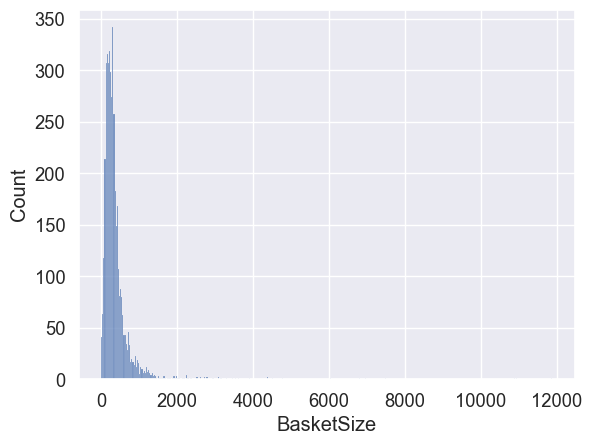

In [ ]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["BasketSize"]);

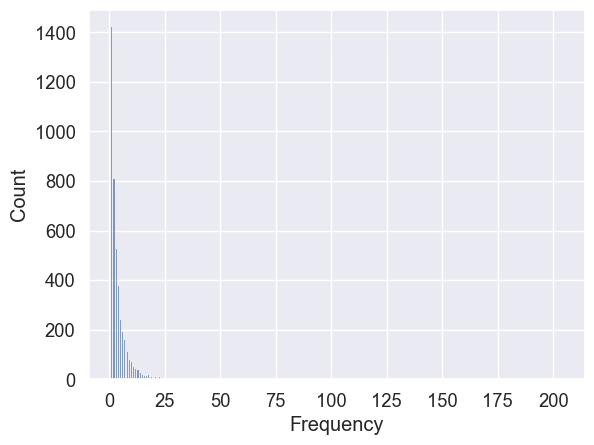

In [ ]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["Frequency"]);

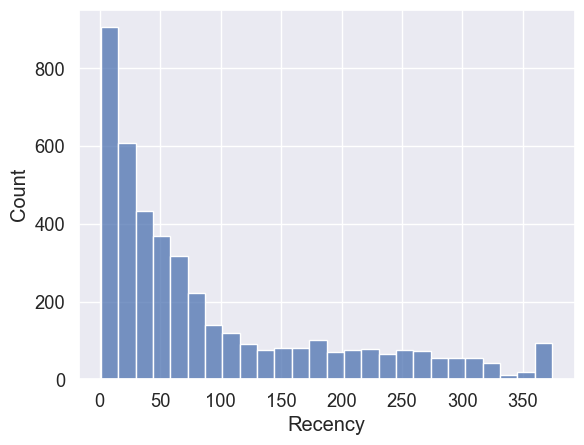

In [ ]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["Recency"]);

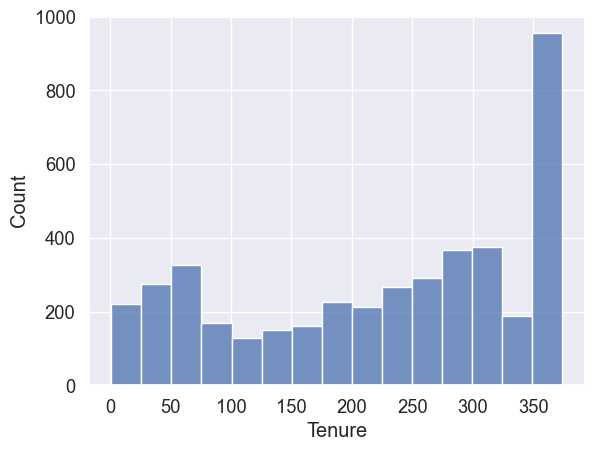

In [ ]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=rfm["Tenure"]);

In [ ]:
#new_df = pd.DataFrame()

In [ ]:
#new_df["Need_Attention"] = rfm[rfm["Segment"] == "Need_Attention"].index

In [ ]:
#new_df.to_csv("Need_Attention.csv")

# CLUSTER - K-MEANS

In [ ]:
import pandas as pd
import argparse
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#from yellowbrick.cluster import KElbowVisualizer
#from pandas.core.common import SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00,165,11,372,361,2,5,2,5,2525,Cant_Loose,33.82
12347.00,3,2,1323,40,5,2,4,1,5241,Potential_Loyalists,661.50
12348.00,74,1,222,74,2,1,1,1,2111,Hibernating,222.00
12349.00,43,3,2671,225,3,3,5,3,3353,Need_Attention,890.33
12351.00,11,1,300,11,5,1,2,1,5121,New_Customers,300.00


In [ ]:
rfm.to_csv("rfm_cluster_data.csv")

In [ ]:
rfm= pd.read_csv("rfm_cluster_data.csv")
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
0,12346.00,165,11,372,361,2,5,2,5,2525,Cant_Loose,33.82
1,12347.00,3,2,1323,40,5,2,4,1,5241,Potential_Loyalists,661.50
2,12348.00,74,1,222,74,2,1,1,1,2111,Hibernating,222.00
3,12349.00,43,3,2671,225,3,3,5,3,3353,Need_Attention,890.33
4,12351.00,11,1,300,11,5,1,2,1,5121,New_Customers,300.00


In [ ]:
rfm.shape

(4312, 12)

In [ ]:
rfm = rfm.set_index("Customer ID")

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00,165,11,372,361,2,5,2,5,2525,Cant_Loose,33.82
12347.00,3,2,1323,40,5,2,4,1,5241,Potential_Loyalists,661.50
12348.00,74,1,222,74,2,1,1,1,2111,Hibernating,222.00
12349.00,43,3,2671,225,3,3,5,3,3353,Need_Attention,890.33
12351.00,11,1,300,11,5,1,2,1,5121,New_Customers,300.00


In [ ]:
rfm.shape

(4312, 11)

In [ ]:
#segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore", "TenureScore"]]
segment_data = rfm[["RecencyScore", "FrequencyScore", "MonetaryScore", "TenureScore"]]

In [ ]:

segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore
Customer ID,,,,
12346.00,2,5,2,5
12347.00,5,2,4,1
12348.00,2,1,1,1
12349.00,3,3,5,3
12351.00,5,1,2,1


In [ ]:
segment_data.shape

(4312, 4)

In [ ]:
segment_data.dtypes

RecencyScore      int64
FrequencyScore    int64
MonetaryScore     int64
TenureScore       int64
dtype: object

In [ ]:
################################
#  Optimal Number of Clusters
################################


In [ ]:
range(2, 12)

range(2, 12)

In [ ]:
K = range(2, 12)

In [ ]:
kmeans = KMeans(n_clusters=4).fit(segment_data)

In [ ]:
kmeans.labels_

array([0, 2, 1, ..., 1, 0, 3], dtype=int32)

In [ ]:
print(kmeans.inertia_)

11514.275177185857


19119.18305991091
14080.250460617099
11514.079637502426
9689.850993285821
8692.679176327767
8038.445315942674
7351.039895781962
6842.98911823834
6357.576512842222
6066.547215867327


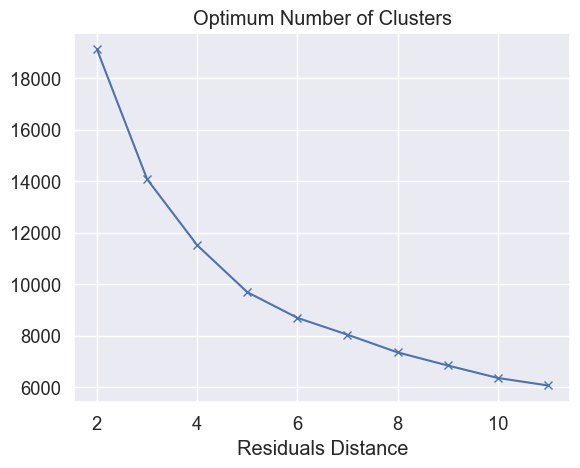

In [ ]:
#kmeans = KMeans()
ssd = []
K = range(2, 12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)


plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()

#Inertia measures how well a dataset was clustered by K-Means.
#It is calculated by measuring the distance between each data point and its centroid,
#squaring this distance, and summing these squares across one cluster.

In [ ]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.4 MB/s eta 0:00:0000:0100:01m


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

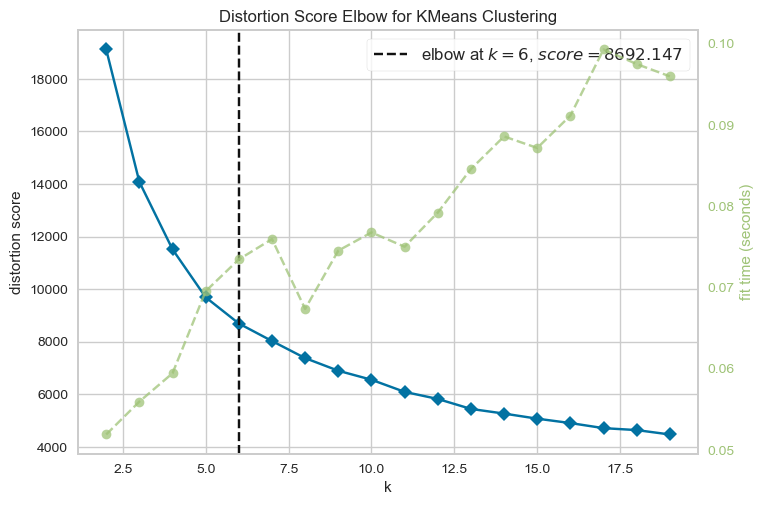

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans(n_clusters=k, random_state=42).fit(segment_data)
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(segment_data)
elbow.show()

In [ ]:
kmeans = KMeans(n_clusters=6).fit(segment_data)

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00,165,11,372,361,2,5,2,5,2525,Cant_Loose,33.82
12347.00,3,2,1323,40,5,2,4,1,5241,Potential_Loyalists,661.50
12348.00,74,1,222,74,2,1,1,1,2111,Hibernating,222.00
12349.00,43,3,2671,225,3,3,5,3,3353,Need_Attention,890.33
12351.00,11,1,300,11,5,1,2,1,5121,New_Customers,300.00


In [ ]:
kmeans.labels_

array([4, 0, 2, ..., 1, 4, 0], dtype=int32)

In [ ]:
segment_data["km_clusters"]  = kmeans.labels_

In [ ]:
################################
# Final Clusters
################################
#Uyarilari Kapat
pd.options.mode.chained_assignment = None

kmeans = KMeans(n_clusters=6).fit(segment_data)
segment_data["km_clusters"] = kmeans.labels_

In [ ]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,km_clusters,clusters
Customer ID,,,,,,
12346.00,2,5,2,5,4,3
12347.00,5,2,4,1,3,1
12348.00,2,1,1,1,1,5
12349.00,3,3,5,3,4,3
12351.00,5,1,2,1,0,0


In [ ]:
segment_data["km_clusters"].value_counts()

km_clusters
2    909
1    846
4    821
0    721
3    630
5    385
Name: count, dtype: int64

In [ ]:
rfm.head()

,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.00,165,11,372,361,2,5,2,5,2525,Cant_Loose,33.82
12347.00,3,2,1323,40,5,2,4,1,5241,Potential_Loyalists,661.50
12348.00,74,1,222,74,2,1,1,1,2111,Hibernating,222.00
12349.00,43,3,2671,225,3,3,5,3,3353,Need_Attention,890.33
12351.00,11,1,300,11,5,1,2,1,5121,New_Customers,300.00


In [ ]:
segment_data.head(20)

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,km_clusters,clusters
Customer ID,,,,,,
12346.00,2,5,2,5,4,3
12347.00,5,2,4,1,3,1
12348.00,2,1,1,1,1,5
12349.00,3,3,5,3,4,3
12351.00,5,1,2,1,0,0
12352.00,5,2,2,1,0,0
12353.00,3,1,2,1,0,0
12355.00,1,1,2,2,1,5
12356.00,4,3,5,1,3,1


In [ ]:
################################
# RFM & K-Means Joining..
################################
segmentation = rfm[["Segment"]].merge(segment_data, on="Customer ID")

In [ ]:
segmentation.head()

,Segment,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,km_clusters,clusters
Customer ID,,,,,,,
12346.00,Cant_Loose,2,5,2,5,4,3
12347.00,Potential_Loyalists,5,2,4,1,3,1
12348.00,Hibernating,2,1,1,1,1,5
12349.00,Need_Attention,3,3,5,3,4,3
12351.00,New_Customers,5,1,2,1,0,0


In [ ]:
segmentation_2 = segment_data[["km_clusters"]].merge(rfm, on="Customer ID")

In [ ]:
segmentation_2.head()

,km_clusters,Recency,Frequency,Monetary,Tenure,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,,
12346.00,4,165,11,372,361,2,5,2,5,2525,Cant_Loose,33.82
12347.00,3,3,2,1323,40,5,2,4,1,5241,Potential_Loyalists,661.50
12348.00,1,74,1,222,74,2,1,1,1,2111,Hibernating,222.00
12349.00,4,43,3,2671,225,3,3,5,3,3353,Need_Attention,890.33
12351.00,0,11,1,300,11,5,1,2,1,5121,New_Customers,300.00


In [ ]:
segmentation_2.groupby("km_clusters").agg({'Recency': ['mean'],'Frequency': ['mean'], 'Monetary': ['mean'], 'Tenure': ['mean'] }, ascending=True)

,Recency,Frequency,Monetary,Tenure
,mean,mean,mean,mean
km_clusters,,,,
0,35.47,1.29,357.18,54.06
1,164.69,1.28,360.97,183.37
2,17.83,12.05,6299.44,339.67
3,22.53,3.77,1538.65,147.58
4,107.63,4.00,1764.16,300.81
5,284.31,1.50,303.79,336.44


In [ ]:
segmentation.dtypes

Segment           object
RecencyScore       int64
FrequencyScore     int64
MonetaryScore      int64
TenureScore        int64
km_clusters        int32
clusters           int32
dtype: object

In [ ]:
pd.crosstab(segmentation["Segment"],segmentation["clusters"])

clusters,0,1,2,3,4,5
Segment,,,,,,
About_to_Sleep,310,10,0,12,4,7
At_Risk,0,2,0,403,91,115
Cant_Loose,0,0,0,76,1,0
Champions,0,178,485,0,0,0
Hibernating,0,0,0,31,276,708
Loyal_Customers,0,159,405,178,0,0
Need_Attention,30,65,0,92,4,16
New_Customers,49,1,0,0,0,0
Potential_Loyalists,246,214,19,29,9,0


# Hierarchical-Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [ ]:
segment_data1 = segment_data.drop(['km_clusters','clusters','MonetaryScore'], axis=1)

In [ ]:
segment_data1.head()

,RecencyScore,FrequencyScore,TenureScore
Customer ID,,,
12346.00,2,5,5
12347.00,5,2,1
12348.00,2,1,1
12349.00,3,3,3
12351.00,5,1,1


In [ ]:
import matplotlib.pyplot as plt

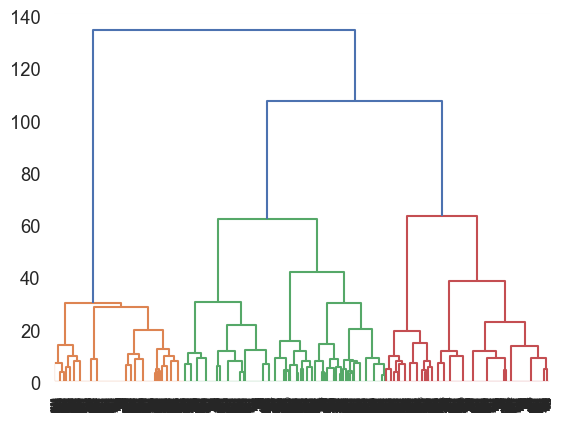

In [ ]:
#Dendrogram plot
#plt.figure(figsize =(10,7))
#plt.title('Dendrogram')

linkage_method = linkage(segment_data1, method ='ward', metric='euclidean')
Dendrogram = dendrogram(linkage_method);

In [ ]:
segment_data1.head()

,RecencyScore,FrequencyScore,TenureScore
Customer ID,,,
12346.00,2,5,5
12347.00,5,2,1
12348.00,2,1,1
12349.00,3,3,3
12351.00,5,1,1


In [ ]:
cluster_ea = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity='euclidean').fit(segment_data1)

In [ ]:
cluster_ea.labels_

array([0, 2, 2, ..., 0, 0, 3])

In [ ]:
segment_data["hc_clusters"] = cluster_ea.labels_

In [ ]:
segment_data = segment_data.drop(['clusters'], axis=1)

In [ ]:
segment_data

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,km_clusters,hc_clusters
Customer ID,,,,,,
12346.00,2,5,2,5,4,0
12347.00,5,2,4,1,3,2
12348.00,2,1,1,1,1,2
12349.00,3,3,5,3,4,0
12351.00,5,1,2,1,0,2
12352.00,5,2,2,1,0,2
12353.00,3,1,2,1,0,2
12355.00,1,1,2,2,1,0
12356.00,4,3,5,1,3,3


In [ ]:
clusters_ = pd.crosstab(segment_data["km_clusters"], segment_data["hc_clusters"])

In [ ]:
clusters_

hc_clusters,0,1,2,3
km_clusters,,,,
0,36,0,621,64
1,520,0,326,0
2,14,895,0,0
3,115,101,31,383
4,679,141,1,0
5,380,5,0,0
